Nama : **GARY ALVARO**

Email : gary.alvaro@students.usu.ac.id

Bergabung sejak 13 Jan 2021 

Kota Medan, Sumatera Utara 


In [ ]:
# Mengimpor library yang diperlukan
import tensorflow as tf
import keras
import os

In [ ]:
# Mendownload file rockpaperscissors via link
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-27 14:00:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.65MB/s    in 66s     

2021-07-27 14:01:25 (4.64 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Mengekstrak file
import zipfile
file = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(file, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Melihat isi direktori
main_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(main_dir)

['scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [ ]:
# Augmentasi gambar

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=90,
            horizontal_flip=True,
            shear_range = 0.2,
            fill_mode = 'wrap',
            validation_split = 0.4)

In [ ]:
# Menentukan target training & validation

train_generator = datagen.flow_from_directory(
  main_dir,
  target_size=(100, 100),
  subset = 'training',
  class_mode='categorical')
  
# validation_generator = datagen.flow_from_directory(
#   main_dir,
#   target_size=(100, 100),
#   subset = 'validation',
#   class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Melakukan training model dengan CNN

model = tf.keras.models.Sequential([
    #Convolution 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    #Convolution 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Convolution 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Convolution 4
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #Convolution 5
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Mengcompile Model

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [ ]:
# Melakukan testing terhadap model

model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 16s - loss: 1.1023 - accuracy: 0.3313 - val_loss: 1.0981 - val_accuracy: 0.2750
Epoch 2/20
25/25 - 14s - loss: 1.0768 - accuracy: 0.4377 - val_loss: 1.0511 - val_accuracy: 0.4375
Epoch 3/20
25/25 - 15s - loss: 1.0074 - accuracy: 0.4775 - val_loss: 0.8476 - val_accuracy: 0.6000
Epoch 4/20
25/25 - 15s - loss: 0.8802 - accuracy: 0.5763 - val_loss: 0.7903 - val_accuracy: 0.6750
Epoch 5/20
25/25 - 15s - loss: 0.7717 - accuracy: 0.6429 - val_loss: 0.7832 - val_accuracy: 0.6062
Epoch 6/20
25/25 - 14s - loss: 0.6952 - accuracy: 0.7169 - val_loss: 0.5432 - val_accuracy: 0.7750
Epoch 7/20
25/25 - 15s - loss: 0.4573 - accuracy: 0.8075 - val_loss: 0.5295 - val_accuracy: 0.8188
Epoch 8/20
25/25 - 14s - loss: 0.4318 - accuracy: 0.8117 - val_loss: 0.5124 - val_accuracy: 0.8125
Epoch 9/20
25/25 - 14s - loss: 0.4187 - accuracy: 0.8234 - val_loss: 0.3396 - val_accuracy: 0.8625
Epoch 10/20
25/25 - 15s - loss: 0.3615 - accuracy: 0.8462 - val_loss: 0.3983 - val_accuracy: 0.8250
Epoch 11/

Saving coba9.png to coba9 (1).png
coba9.png
SCISSORS!!!


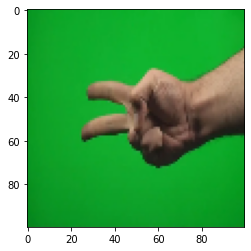

In [ ]:
# Melakukan proses klasifikasi terhadap gambar yang diupload

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
  
uploaded = files.upload()
  
for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)

  print(fn)
  if output_class==0:
    print('PAPER!!!')
  elif output_class==1:
    print('ROCK!!!')
  else:
    print('SCISSORS!!!')